# <div style="text-align: center"> PRUEBAS DE HIPÓTESIS </div>


### Profesor: Carlos Alfonso Mantilla
### grupo: F1

### Integrantes:
* Christian Ruiz 
 
* Nicolas Galvan
 
* David Rojas

El estudiante debe descargar el archivo del siguiente enlace y realizar el respectivo análisis haciendo uso de los modelos lineales: https://www.dropbox.com/s/vv0f1k2y5nalpgx/bank-additional-full.csv?dl=0

Los datos están relacionados con las campañas de marketing directo de una institución bancaria portuguesa. Las campañas de marketing se basaron en llamadas telefónicas. A menudo, se requería más de un contacto con el mismo cliente, para poder acceder si el producto (depósito bancario) estaba ("sí") o no ("no") suscrito.

Las variables registradas son las siguientes:

-    `age` - edad
-    `job` - tipo de trabajo 
-    `marital` - estado civil
-    `education` - nivel educativo
-    `default` - crédito en incumplimiento
-    `housing` - crédito de vivienda
-    `loan` - préstamos personal
-    `contact` - tipo de contacto realizado
-    `month` - mes en que se hizo el último contacto
-    `day_of_week` - último día de contacto de la semana
-    `duration` - duración del último contacto, en segundos
-    `campaign` - número de contactos realizados durante esta campaña y para este cliente
-    `pdays` - número de días que pasaron después de que el cliente fue contactado por última vez desde una campaña anterior (999 significa que el cliente no fue contactado previamente)
-    `previous`- número de contactos realizados antes de esta campaña y para este cliente
-    `poutcome` - resultado de la campaña de marketing anterior
-    `emp.var.rate`- tasa de variación del empleo - indicador trimestral
-    `cons.price.idx` - índice de precios al consumidor - indicador mensual
-    `cons.conf.idx` - índice de confianza del consumidor - indicador mensual
-    `euribor3m` - euribor tasa de 3 meses - indicador diario
-    `nr.employed` - número de empleados
-    `y` - ¿el cliente ha suscrito un depósito a plazo?

Los datos fueron tomados de: S. Moro, R. Laureano and P. Cortez. Using Data Mining for Bank Direct Marketing: An Application of the CRISP-DM Methodology. In P. Novais et al. (Eds.), Proceedings of the European Simulation and Modelling Conference - ESM'2011, pp. 117-121, Guimarães, Portugal, October, 2011. EUROSIS.

In [1]:
#ejecutar en caso de no tener las librerias
install.packages("corrplot")
install.packages("Hmisc")
install.packages('lmtest')

package 'corrplot' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\David\AppData\Local\Temp\Rtmp2dp0PC\downloaded_packages


also installing the dependencies 'png', 'jpeg', 'checkmate', 'survival', 'Formula', 'latticeExtra', 'acepack', 'gridExtra', 'htmlTable', 'viridis'



package 'png' successfully unpacked and MD5 sums checked
package 'jpeg' successfully unpacked and MD5 sums checked
package 'checkmate' successfully unpacked and MD5 sums checked
package 'survival' successfully unpacked and MD5 sums checked
package 'Formula' successfully unpacked and MD5 sums checked
package 'latticeExtra' successfully unpacked and MD5 sums checked
package 'acepack' successfully unpacked and MD5 sums checked
package 'gridExtra' successfully unpacked and MD5 sums checked
package 'htmlTable' successfully unpacked and MD5 sums checked
package 'viridis' successfully unpacked and MD5 sums checked
package 'Hmisc' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\David\AppData\Local\Temp\Rtmp2dp0PC\downloaded_packages
package 'lmtest' successfully unpacked and MD5 sums checked

The downloaded binary packages are in
	C:\Users\David\AppData\Local\Temp\Rtmp2dp0PC\downloaded_packages


In [2]:
library("corrplot")
library("lmtest")
library("Hmisc")

Warning message:
"package 'corrplot' was built under R version 3.6.3"corrplot 0.84 loaded
Warning message:
"package 'lmtest' was built under R version 3.6.3"Loading required package: zoo

Attaching package: 'zoo'

The following objects are masked from 'package:base':

    as.Date, as.Date.numeric

Warning message:
"package 'Hmisc' was built under R version 3.6.3"Loading required package: lattice
Loading required package: survival
Warning message:
"package 'survival' was built under R version 3.6.3"Loading required package: Formula
Loading required package: ggplot2
Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Attaching package: 'Hmisc'

The following objects are masked from 'package:base':

    format.pval, units



In [3]:
bank<-read.csv("bank-additional-full.csv")
head(bank)

age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no
45,services,married,basic.9y,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191,no


In [4]:
#Variables continuas

data<-data.frame(
    edad=bank$age,
    duracion=bank$duration,
    campaña=bank$campaign,
    dias=bank$pdays,
    crac=bank$previous,
    tve=bank$emp.var.rate,
    ipc=bank$cons.price.idx,
    icc=bank$cons.conf.idx,
    euribor=bank$euribor3m,
    nemp=bank$nr.employed 
)

In [5]:
head(data)

edad,duracion,campaña,dias,crac,tve,ipc,icc,euribor,nemp
56,261,1,999,0,1.1,93.994,-36.4,4.857,5191
57,149,1,999,0,1.1,93.994,-36.4,4.857,5191
37,226,1,999,0,1.1,93.994,-36.4,4.857,5191
40,151,1,999,0,1.1,93.994,-36.4,4.857,5191
56,307,1,999,0,1.1,93.994,-36.4,4.857,5191
45,198,1,999,0,1.1,93.994,-36.4,4.857,5191


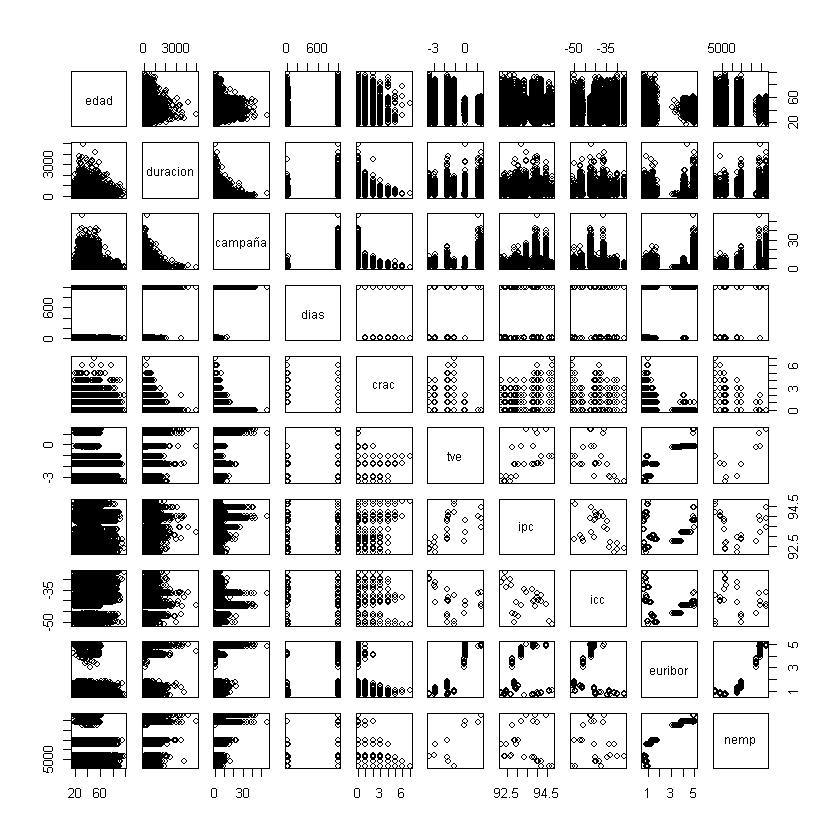

In [6]:
plot(data)

In [7]:
summary(data)

      edad          duracion         campaña            dias      
 Min.   :17.00   Min.   :   0.0   Min.   : 1.000   Min.   :  0.0  
 1st Qu.:32.00   1st Qu.: 102.0   1st Qu.: 1.000   1st Qu.:999.0  
 Median :38.00   Median : 180.0   Median : 2.000   Median :999.0  
 Mean   :40.02   Mean   : 258.3   Mean   : 2.568   Mean   :962.5  
 3rd Qu.:47.00   3rd Qu.: 319.0   3rd Qu.: 3.000   3rd Qu.:999.0  
 Max.   :98.00   Max.   :4918.0   Max.   :56.000   Max.   :999.0  
      crac            tve                ipc             icc       
 Min.   :0.000   Min.   :-3.40000   Min.   :92.20   Min.   :-50.8  
 1st Qu.:0.000   1st Qu.:-1.80000   1st Qu.:93.08   1st Qu.:-42.7  
 Median :0.000   Median : 1.10000   Median :93.75   Median :-41.8  
 Mean   :0.173   Mean   : 0.08189   Mean   :93.58   Mean   :-40.5  
 3rd Qu.:0.000   3rd Qu.: 1.40000   3rd Qu.:93.99   3rd Qu.:-36.4  
 Max.   :7.000   Max.   : 1.40000   Max.   :94.77   Max.   :-26.9  
    euribor           nemp     
 Min.   :0.634   Min.  

In [8]:
#Funcion para calcular el Coeficiente de correlacion multiple.
rho.mult<-function(datos)
# datos: matriz con las variables del problema.
# La primera columna debe ser la variable respuesta.
# Las restantes p-1 columnas son las variables explicativas.
{
matriz<-var(datos)
# calculo
n<-nrow(datos)
p<-ncol(matriz)
sxx<-matriz[2:p,2:p]
syx<-matrix(matriz[1,2:p],nrow=1)
sxy<-t(syx)
#coeficiente
rho.mult<-sqrt(syx%*%solve(sxx)%*%sxy)/sqrt(matriz[1,1])
cat("\n Coeficiente de correlacion multiple: ",rho.mult,"\n")
#estadistico
if(abs(rho.mult)==1)
stop("Imposible resolver contraste.
Coeficiente de correlacion multiple igual a 1", call. = FALSE)
else{
est<-((n-(p-1)-1)*rho.mult)/((p-1)*(1-rho.mult^2))
#grafico
par(mfrow=c(1,1))
x<-seq(0,qf(0.999,p-1,n-(p-1)-1),length=500)
plot(x,df(x,p-1,n-(p-1)-1),type="l",ylab="densidad",
main="Contraste Correlacion Multiple")
abline(v=qf(0.975,p-1,n-(p-1)-1),col="red")
abline(v=qf(0.025,p-1,n-(p-1)-1),col="red")
abline(v=est,col="blue")
abline(h=0)
legend(qf(0.98,p-1,n-(p-1)-1),pf((p+3)/(n-p),p-1,n-(p-1)-1),
c("Estadistico","Region Critica"),lty=rep(1,2),
col=c("blue","red"),bty="n")
cat("\n Estadistico de contraste: ",round(est,3),"\n")
cat("\n p-valor: ",round(2*(1-pf(est,p-1,n-(p-1)-1)),3),"\n\n")}
return(invisible())
}


 Coeficiente de correlacion multiple:  0.1361223 

 Estadistico de contraste:  634.563 

 p-valor:  0 



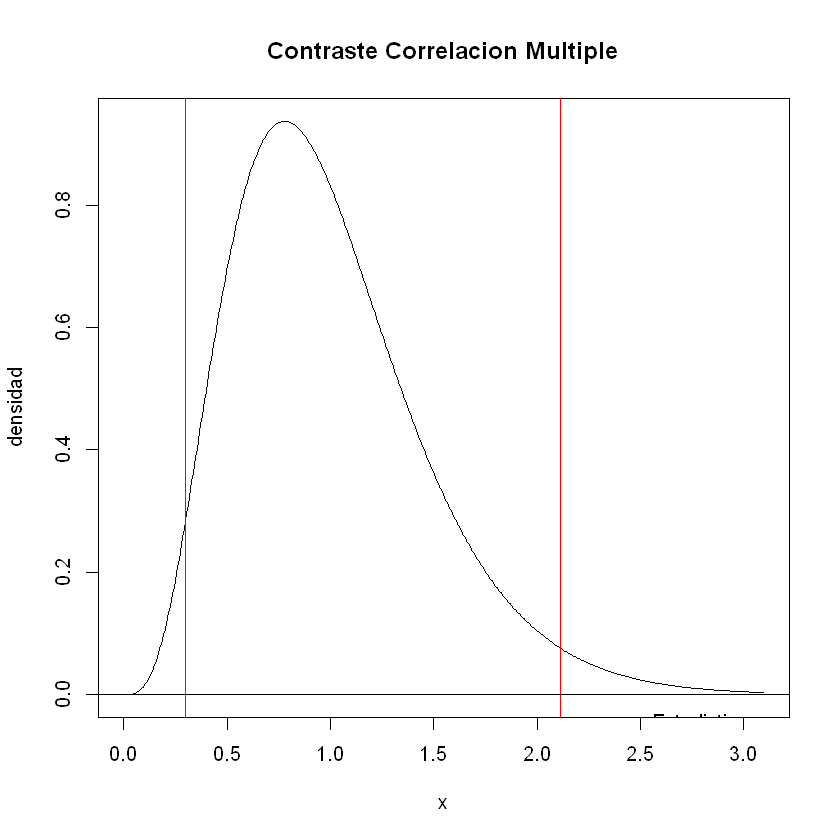

In [9]:
rho.mult(data)

In [10]:
rcorr(as.matrix(data))

          edad duracion campaña  dias  crac   tve   ipc   icc euribor  nemp
edad      1.00     0.00    0.00 -0.03  0.02  0.00  0.00  0.13    0.01 -0.02
duracion  0.00     1.00   -0.07 -0.05  0.02 -0.03  0.01 -0.01   -0.03 -0.04
campaña   0.00    -0.07    1.00  0.05 -0.08  0.15  0.13 -0.01    0.14  0.14
dias     -0.03    -0.05    0.05  1.00 -0.59  0.27  0.08 -0.09    0.30  0.37
crac      0.02     0.02   -0.08 -0.59  1.00 -0.42 -0.20 -0.05   -0.45 -0.50
tve       0.00    -0.03    0.15  0.27 -0.42  1.00  0.78  0.20    0.97  0.91
ipc       0.00     0.01    0.13  0.08 -0.20  0.78  1.00  0.06    0.69  0.52
icc       0.13    -0.01   -0.01 -0.09 -0.05  0.20  0.06  1.00    0.28  0.10
euribor   0.01    -0.03    0.14  0.30 -0.45  0.97  0.69  0.28    1.00  0.95
nemp     -0.02    -0.04    0.14  0.37 -0.50  0.91  0.52  0.10    0.95  1.00

n= 41188 


P
         edad   duracion campaña dias   crac   tve    ipc    icc    euribor
edad            0.8605   0.3512  0.0000 0.0000 0.9400 0.8620 0.0000 0.028

In [11]:
#Ahora graficamente
M<-cor(data)

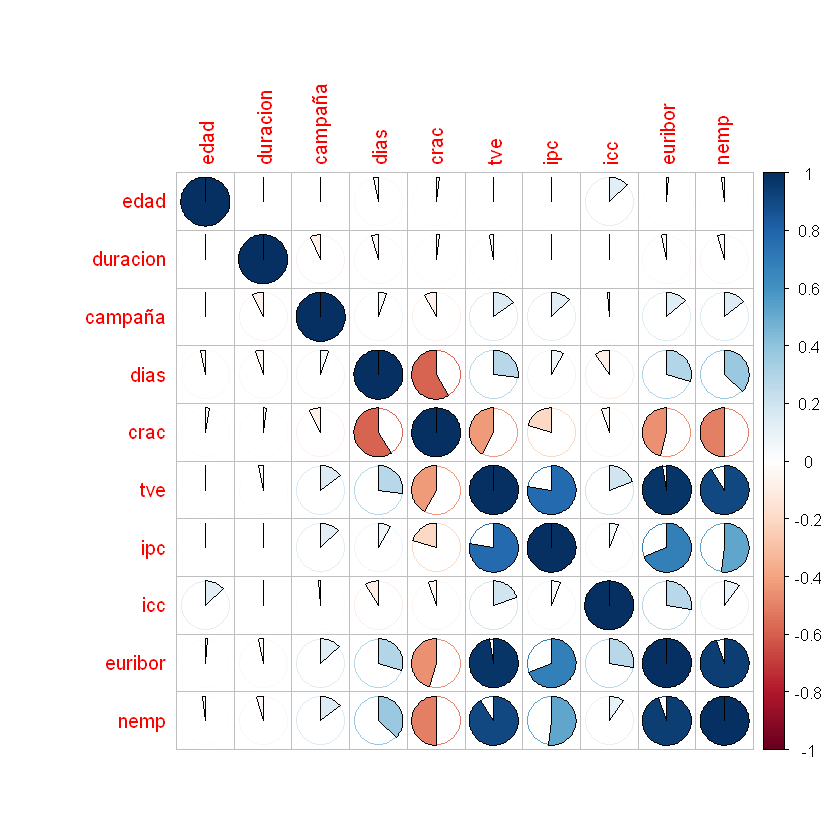

In [12]:
corrplot(M, method="pie")

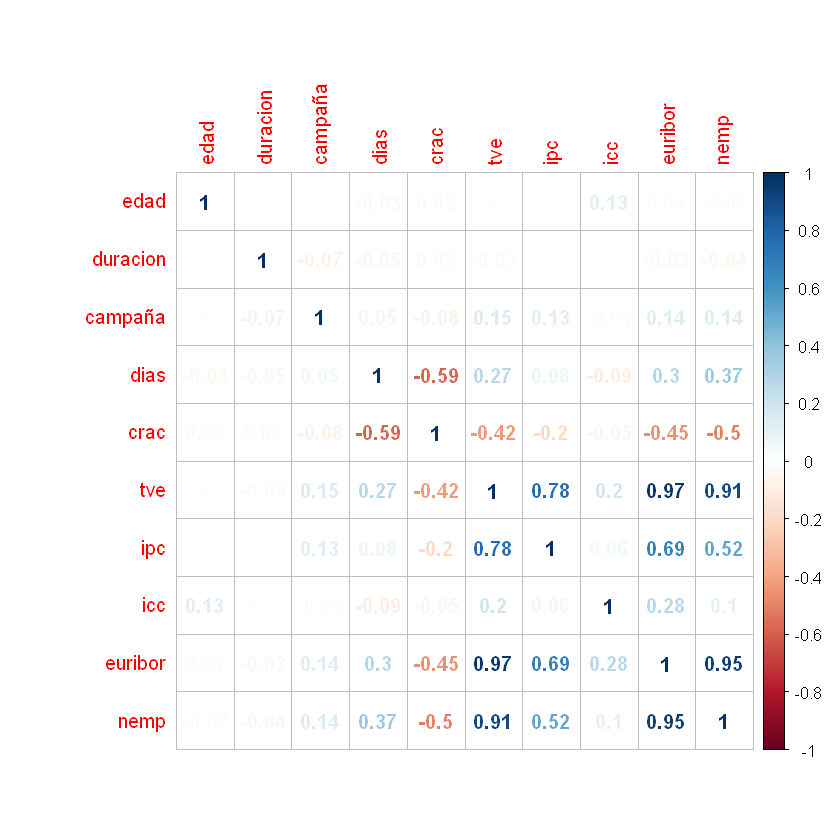

In [13]:
corrplot(M, method="number")

## Modelos Lineales

La variable dependiente que vamos a usar es "euribor", porque tiene los índices más grandes de correlación. Otras variables que presentan índices de correlación altos son "tve" y "nemp".

### 1. Modelo Lineal Multiple

In [14]:
fit<-lm(euribor~., data)
summary(fit)


Call:
lm(formula = euribor ~ ., data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57888 -0.17510  0.00259  0.13971  1.04407 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -9.220e+01  6.275e-01 -146.945  < 2e-16 ***
edad         2.916e-04  1.032e-04    2.825  0.00472 ** 
duracion     9.026e-06  4.129e-06    2.186  0.02881 *  
campaña     -6.600e-03  3.906e-04  -16.897  < 2e-16 ***
dias         1.917e-05  7.243e-06    2.646  0.00814 ** 
crac         3.716e-03  2.886e-03    1.288  0.19780    
tve          4.117e-01  3.331e-03  123.600  < 2e-16 ***
ipc          3.377e-01  4.325e-03   78.085  < 2e-16 ***
icc          5.398e-02  2.640e-04  204.500  < 2e-16 ***
nemp         1.284e-02  5.370e-05  239.169  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2162 on 41178 degrees of freedom
Multiple R-squared:  0.9845,	Adjusted R-squared:  0.9845 
F-statistic: 2.898e+05 on 9 and 4

Podemos afirmar que un 98,45 % de la varianza puede ser explicada por el predictor y que el p-value es significativo (2.2*10^-16). De igual forma, podemos concluir que el modelo es útil y que existe una relación entre los predictores y la variable respuesta (al menos uno de los coeficientes es distinto a 0)

#### Comportamiento del modelo

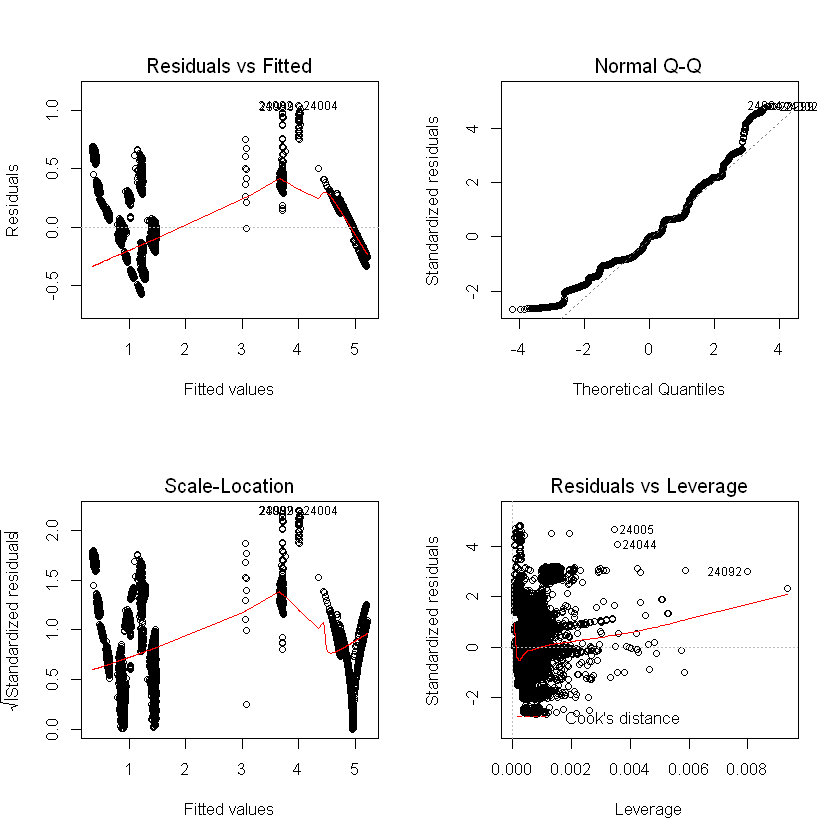

In [23]:
par(mfrow = c(2,2))
plot(fit)
par(mfrow = c(1,1))

### 2. Modelo lineal con variables escogidas en base a la matriz de correlación

In [16]:
fitm <- lm(euribor ~  tve+ipc+icc+nemp+crac , data)
summary(fitm)


Call:
lm(formula = euribor ~ tve + ipc + icc + nemp + crac, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.55942 -0.17572  0.01432  0.14739  1.04944 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)    
(Intercept) -9.190e+01  6.295e-01 -145.99   <2e-16 ***
tve          4.113e-01  3.343e-03  123.02   <2e-16 ***
ipc          3.354e-01  4.331e-03   77.44   <2e-16 ***
icc          5.410e-02  2.601e-04  207.96   <2e-16 ***
nemp         1.283e-02  5.375e-05  238.68   <2e-16 ***
crac         5.770e-04  2.509e-03    0.23    0.818    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.217 on 41182 degrees of freedom
Multiple R-squared:  0.9843,	Adjusted R-squared:  0.9843 
F-statistic: 5.178e+05 on 5 and 41182 DF,  p-value: < 2.2e-16


#### Comportamiento del modelo

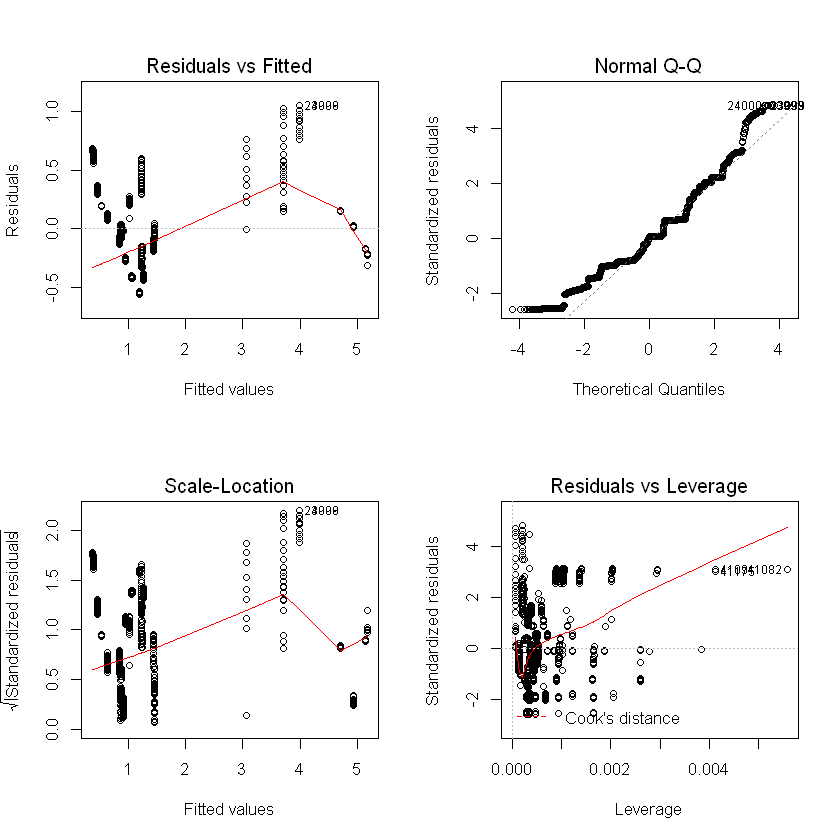

In [24]:
par(mfrow = c(2,2))
plot(fitm)
par(mfrow = c(1,1))

### 3. Modelo lineal múltiple con variables según "step"

In [17]:
step(fit)

Start:  AIC=-126138.4
euribor ~ edad + duracion + campaña + dias + crac + tve + ipc + 
    icc + nemp

           Df Sum of Sq    RSS     AIC
- crac      1      0.08 1925.5 -126139
<none>                  1925.4 -126138
- duracion  1      0.22 1925.7 -126136
- dias      1      0.33 1925.8 -126133
- edad      1      0.37 1925.8 -126132
- campaña   1     13.35 1938.8 -125856
- ipc       1    285.10 2210.5 -120453
- tve       1    714.34 2639.8 -113144
- icc       1   1955.47 3880.9  -97271
- nemp      1   2674.71 4600.2  -90268

Step:  AIC=-126138.7
euribor ~ edad + duracion + campaña + dias + tve + ipc + icc + 
    nemp

           Df Sum of Sq    RSS     AIC
<none>                  1925.5 -126139
- duracion  1      0.22 1925.7 -126136
- dias      1      0.25 1925.8 -126135
- edad      1      0.38 1925.9 -126133
- campaña   1     13.38 1938.9 -125855
- ipc       1    285.15 2210.7 -120453
- tve       1    716.71 2642.2 -113108
- icc       1   1971.31 3896.8  -97105
- nemp      1   2742.


Call:
lm(formula = euribor ~ edad + duracion + campaña + dias + tve + 
    ipc + icc + nemp, data = data)

Coefficients:
(Intercept)         edad     duracion      campaña         dias          tve  
 -9.212e+01    2.935e-04    8.900e-06   -6.608e-03    1.451e-05    4.119e-01  
        ipc          icc         nemp  
  3.375e-01    5.395e-02    1.283e-02  


In [18]:
fit_step <- lm(euribor ~ edad + duracion + campaña + dias + tve + ipc + icc + nemp, data)
summary(fit_step)


Call:
lm(formula = euribor ~ edad + duracion + campaña + dias + tve + 
    ipc + icc + nemp, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-0.57783 -0.17512  0.00253  0.13950  1.04399 

Coefficients:
              Estimate Std. Error  t value Pr(>|t|)    
(Intercept) -9.212e+01  6.243e-01 -147.564  < 2e-16 ***
edad         2.935e-04  1.032e-04    2.845  0.00445 ** 
duracion     8.900e-06  4.127e-06    2.156  0.03107 *  
campaña     -6.608e-03  3.906e-04  -16.918  < 2e-16 ***
dias         1.451e-05  6.277e-06    2.312  0.02077 *  
tve          4.119e-01  3.327e-03  123.804  < 2e-16 ***
ipc          3.375e-01  4.322e-03   78.091  < 2e-16 ***
icc          5.395e-02  2.627e-04  205.324  < 2e-16 ***
nemp         1.283e-02  5.298e-05  242.175  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 0.2162 on 41179 degrees of freedom
Multiple R-squared:  0.9845,	Adjusted R-squared:  0.9845 
F-statistic: 3.261e+05 on 8 

In [41]:
confint(fit_step)

,2.5 %,97.5 %
(Intercept),-9.334615e+01,-9.089892e+01
edad,9.128668e-05,4.957693e-04
duracion,8.097759e-07,1.698966e-05
campaña,-7.373352e-03,-5.842248e-03
dias,2.210684e-06,2.681826e-05
tve,4.054094e-01,4.184524e-01
ipc,3.290440e-01,3.459868e-01
icc,5.343228e-02,5.446224e-02
nemp,1.272765e-02,1.293535e-02


#### Comportamiento del modelo

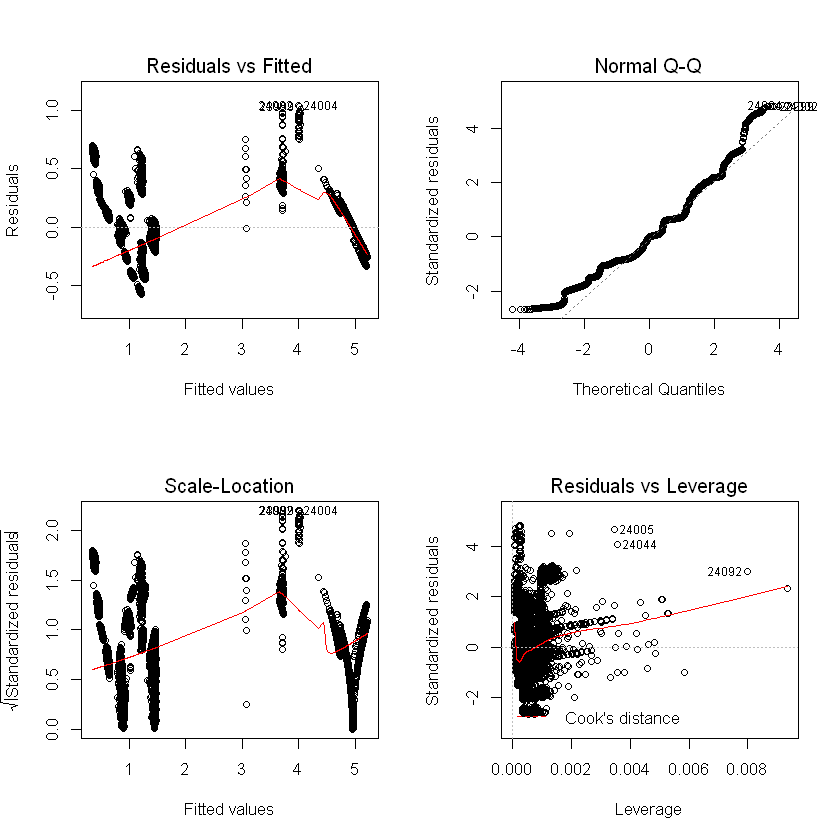

In [25]:
par(mfrow = c(2,2))
plot(fit_step)
par(mfrow = c(1,1))

### 4. Modelo con regresión múltiple

Indicador euribor a 3 meses & Número de empleados

In [43]:
varsel<-data[,c(9,10)]
summary(varsel)

    euribor           nemp     
 Min.   :0.634   Min.   :4964  
 1st Qu.:1.344   1st Qu.:5099  
 Median :4.857   Median :5191  
 Mean   :3.621   Mean   :5167  
 3rd Qu.:4.961   3rd Qu.:5228  
 Max.   :5.045   Max.   :5228  

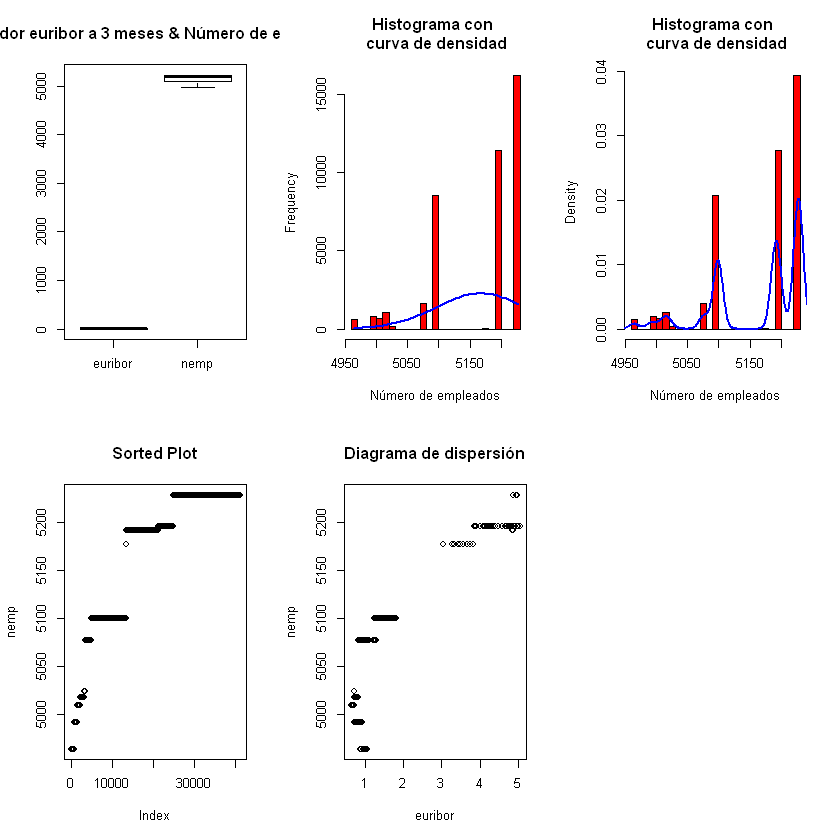

In [44]:
# Algunos gráficos exploratorios
par(mfrow=c(2,3))
x <- varsel$nemp
boxplot(varsel, main="Indicador euribor a 3 meses & Número de empleados")
h<-hist(x, breaks=25, col="red", xlab="Número de empleados", main="Histograma con \n curva de densidad")
xfit<-seq(min(x), max(x), length=40)
yfit<-dnorm(xfit, mean=mean(x), sd=sd(x))
yfit <- yfit*diff(h$mids[1:2])*length(x)
lines(xfit, yfit, col="blue", lwd=2)
h<-hist(x, freq = F, breaks=25, col="red", xlab="Número de empleados", main="Histograma con \n curva de densidad")
lines(density(x), col="blue", lwd=2)
plot(sort(x),ylab="nemp", main = "Sorted Plot")
with(data, plot(euribor,nemp, main = "Diagrama de dispersión"))
par(mfrow=c(1,1))

In [45]:
regresion <- lm(nemp ~ euribor, data)
summary(regresion)


Call:
lm(formula = nemp ~ euribor, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-102.199  -24.610    8.278   12.136   31.639 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 5.024e+03  2.692e-01 18664.7   <2e-16 ***
euribor     3.937e+01  6.704e-02   587.3   <2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 23.6 on 41186 degrees of freedom
Multiple R-squared:  0.8933,	Adjusted R-squared:  0.8933 
F-statistic: 3.449e+05 on 1 and 41186 DF,  p-value: < 2.2e-16


Los componentes de la ecuación de la recta de mínimos cuadrados fueron dados en la celda anterior, y la ecuación sería:

<center>$y=5024+39.370x+23.6$</center>

In [47]:
with(data, cor.test(nemp,euribor))


	Pearson's product-moment correlation

data:  nemp and euribor
t = 587.26, df = 41186, p-value < 2.2e-16
alternative hypothesis: true correlation is not equal to 0
95 percent confidence interval:
 0.9441146 0.9461754
sample estimates:
      cor 
0.9451544 


### Comparaciones entre los modelos

In [21]:
# Modelo 1 vs Modelo 2
AIC(fit,fitm)
BIC(fit,fitm)

,df,AIC
fit,11,-9249.906
fitm,7,-8948.444


,df,BIC
fit,11,-9155.021
fitm,7,-8888.063


In [22]:
# Modelo 1 vs Modelo 3
AIC(fit,fit_step)
BIC(fit,fit_step)

,df,AIC
fit,11,-9249.906
fit_step,10,-9250.247


,df,BIC
fit,11,-9155.021
fit_step,10,-9163.988


Con estos datos pudimos observar que el modelo lineal múltiple con variables según "step" (modelo 3) es el que obtuvo mejores resultados en las comparaciones, gracias a que obtuvo menores valores AIC (criterio de información de Akaike) y BIC (criterio de información bayesiana).

### Supuestos

In [49]:
# Homocedasticidad con los modelos 1, 2, 3 y 4.
bptest(fit)
bptest(fitm)
bptest(fit_step)
bptest(regresion)


	studentized Breusch-Pagan test

data:  fit
BP = 2241.6, df = 9, p-value < 2.2e-16



	studentized Breusch-Pagan test

data:  fitm
BP = 1965.8, df = 5, p-value < 2.2e-16



	studentized Breusch-Pagan test

data:  fit_step
BP = 2080.4, df = 8, p-value < 2.2e-16



	studentized Breusch-Pagan test

data:  regresion
BP = 6174.1, df = 1, p-value < 2.2e-16


$H_{0}:$ Modelo Homocedástico

$H_{1}:$ Modelo Heterocedástico

Debido a que los p-valores son menores a 0.05, la hipótesis nula queda descartada y concluimos que los 3 modelos son heterocedásticos.


El supuesto de homocedasticidad se puede verificar con la exploración gráfica:

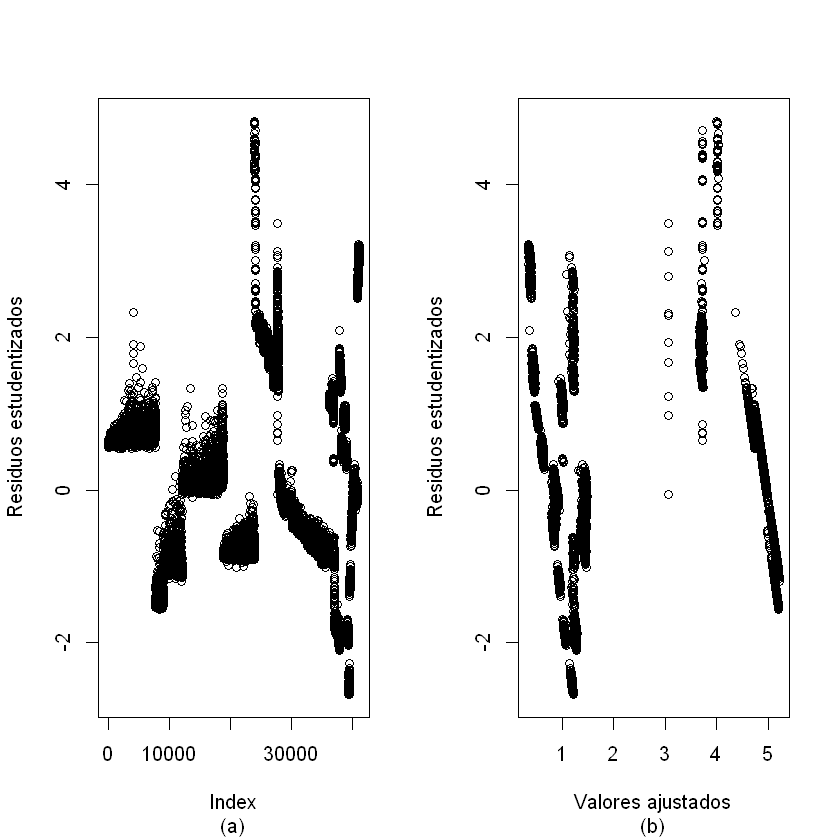

In [33]:
r<-rstandard(fit)
opar<-par(mfrow=c(1,2))
# los residuos solos
plot(r,ylab='Residuos estudentizados')
title(sub="(a)")
# los residuos versus los valores ajustados
plot(fitted(fit),r,xlab='Valores ajustados',
     ylab='Residuos estudentizados')
title(sub="(b)")
par(opar)

In [48]:
# Icorrelacion con los modelos 1, 2, 3 y 4.
dwtest(fit)
dwtest(fitm)
dwtest(fit_step)
dwtest(regresion)


	Durbin-Watson test

data:  fit
DW = 0.014253, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0



	Durbin-Watson test

data:  fitm
DW = 0.0023114, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0



	Durbin-Watson test

data:  fit_step
DW = 0.014179, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0



	Durbin-Watson test

data:  regresion
DW = 0.00040634, p-value < 2.2e-16
alternative hypothesis: true autocorrelation is greater than 0


$H_{0}: icorr = 0$ 

$H_{1}: icorr> 0$  

Debido a que el p-valor es menor que $0.05$, la hipótesis nula queda descartada y podemos afirmar que todos los datos de los tres modelos se encuentran icorrelacionados.

In [50]:
# Normalidad con los modelos 1, 2, 3 y 4.
ks.test(fit$residuals,pnorm,mean(fit$residuals),sd(fit$residuals))
ks.test(fitm$residuals,pnorm,mean(fitm$residuals),sd(fitm$residuals))
ks.test(fit_step$residuals,pnorm,mean(fit_step$residuals),sd(fit_step$residuals))
ks.test(regresion$residuals,pnorm,mean(regresion$residuals),sd(regresion$residuals))

Warning message in ks.test(fit$residuals, pnorm, mean(fit$residuals), sd(fit$residuals)):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  fit$residuals
D = 0.081046, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message in ks.test(fitm$residuals, pnorm, mean(fitm$residuals), sd(fitm$residuals)):
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  fitm$residuals
D = 0.10778, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message in ks.test(fit_step$residuals, pnorm, mean(fit_step$residuals), :
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  fit_step$residuals
D = 0.081333, p-value < 2.2e-16
alternative hypothesis: two-sided


Warning message in ks.test(regresion$residuals, pnorm, mean(regresion$residuals), :
"ties should not be present for the Kolmogorov-Smirnov test"


	One-sample Kolmogorov-Smirnov test

data:  regresion$residuals
D = 0.32423, p-value < 2.2e-16
alternative hypothesis: two-sided


$H_{0}:$ Los datos residuales actúan como una distibución normal.

$H_{1}:$ Los datos residuales no actúan como una distibución normal.

Debido a que todos los p_valores en los modelos 1, 2, 3 y 4 son menores a $0.05$, podemos descartar la hipótesis nula y afirmar que los datos residuales no actúan o se comportan como una distribución normal.